#Laboratorio 1
Nombres:
<h4>-David Franz Soliz Ortega<br></h4>
<h4>-Luis Fabian Jorge Cedillo<br></h4>
<h4>-Abel Mollo Condori<br></h4>
<h4>-Luis Alberto Ibarra Calderon<br></h4>

Dataset: https://www.kaggle.com/datasets/yakhyojon/automatidata?select=2017_Yellow_Taxi_Trip_Data.csv

18 propiedades y tiene 22699 ejemplos

In [12]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Regresión lineal con multiples variables
Implementamos la regresión lineal multivariable para encontrar los parámetros theta que mejor predicen el total_amount.
Paso 1: Preparación y Normalización de Datos
Primero, cargamos los datos y seleccionamos las características relevantes, que en este caso son trip_distance, fare_amount, extra, mta_tax, tip_amount, y tolls_amount.

In [5]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/SIS420/Laboratorios/lab_01/tarifataxi.txt')

# Mostrar las primeras filas del dataset para entender su estructura
print(data.head())

   Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0    24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1    35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2   106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3    38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4    30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0 

#Seleccion de caracteristicas 'x' y la variable 'y'

In [6]:
# Seleccionamos las características relevantes
# Por ejemplo, podríamos elegir 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount'
X = data[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']]

# La variable objetivo es el 'total_amount'
y = data['total_amount']

# Número de ejemplos en el dataset
m = y.size
print(f'Número de ejemplos en el dataset: {m}')


Número de ejemplos en el dataset: 22699


# Normalización de características
La normalización se realiza para escalar las características de manera que todas estén en un rango similar, evitando que alguna característica con valores grandes domine las demás durante el entrenamiento.

In [7]:
def featureNormalize(X):
    # Crear copias para evitar modificar el original
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calcular la media y la desviación estándar
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # Normalizar las características
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normalizamos las características
X_norm, mu, sigma = featureNormalize(X)

# Verificar los valores normalizados
print(X_norm.head())


   trip_distance  fare_amount     extra   mta_tax  tip_amount  tolls_amount
0       0.116802    -0.002011 -0.719681  0.064747    0.330012     -0.223375
1      -0.304759     0.224515 -0.719681  0.064747    0.772779     -0.223375
2      -0.523752    -0.492818 -0.719681  0.064747   -0.137751     -0.223375
3       0.215348     0.564305 -0.719681  0.064747    1.626179     -0.223375
4       0.398755     0.262270  0.360031  0.064747   -0.655504     -0.223375


# Añadir el término de intersección (columna de unos) a X

In [8]:
# Añadir una columna de unos a X (para el término de intersección)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(f'X después de añadir la columna de unos:\n{X[:5]}')


X después de añadir la columna de unos:
[[ 1.          0.11680167 -0.00201075 -0.71968127  0.06474688  0.33001156
  -0.2233746 ]
 [ 1.         -0.30475918  0.22451549 -0.71968127  0.06474688  0.77277943
  -0.2233746 ]
 [ 1.         -0.52375182 -0.49281761 -0.71968127  0.06474688 -0.13775126
  -0.2233746 ]
 [ 1.          0.21534836  0.56430485 -0.71968127  0.06474688  1.62617878
  -0.2233746 ]
 [ 1.          0.3987547   0.26226986  0.3600309   0.06474688 -0.65550401
  -0.2233746 ]]


# Implementación del descenso por el gradiente
Función de Costo: Calcula qué tan lejos están las predicciones del modelo de los valores reales.
Descenso por Gradiente: Optimiza los parámetros theta minimizando la función de costo iterativamente.

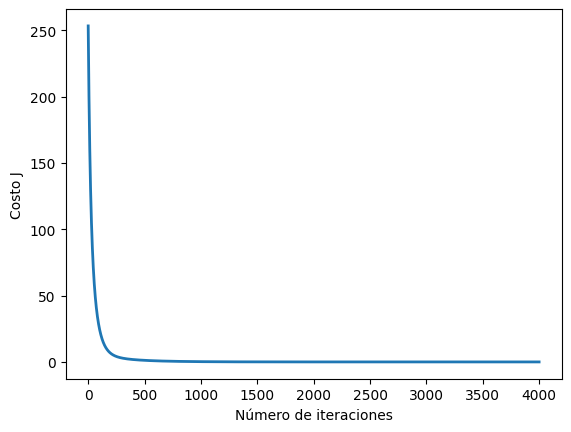

Theta calculado por el descenso por el gradiente: [1.63105022e+01 5.06155622e-03 1.32423665e+01 4.60009778e-01
 5.01152000e-02 2.80383944e+00 1.39854695e+00]


In [9]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]  # Número de ejemplos de entrenamiento
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # Número de ejemplos de entrenamiento
    theta = theta.copy()  # Crear una copia de theta
    J_history = []  # Para almacenar la historia del costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# Inicializamos theta con ceros
theta = np.zeros(X.shape[1])

# Configuración del descenso por el gradiente
alpha = 0.01  # Tasa de aprendizaje
num_iters = 4000  # Número de iteraciones

# Ejecutar el descenso por el gradiente
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Mostrar los resultados finales
print(f'Theta calculado por el descenso por el gradiente: {theta}')


# Predicción con el modelo ajustado
Podemos usar el modelo entrenado para hacer predicciones. Por ejemplo, predecir el total_amount para un viaje con ciertas características:

In [10]:
# Ejemplo de valores de entrada (modifica según lo que quieras predecir)
# Supongamos que tenemos un viaje con una distancia de 2 millas, una tarifa de $10, un extra de $0.50, un MTA tax de $0.50, un tip de $1.50, y tolls de $0
X_example = [1, 2, 10, 0.5, 0.5, 1.5, 0]

# Normalizamos las características usando los valores mu y sigma que calculamos anteriormente
X_example[1:] = (X_example[1:] - mu) / sigma

# Realizamos la predicción
predicted_total_amount = np.dot(X_example, theta)
print(f'El total_amount predicho para el viaje es: ${predicted_total_amount:.2f}')


El total_amount predicho para el viaje es: $12.80


# Implementación de la ecuación normal (opcional)
Si quieres probar la ecuación normal, que no requiere de iteraciones:

In [11]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Calcular theta usando la ecuación normal
theta_normal = normalEqn(X, y)

# Predicción con la ecuación normal
predicted_total_amount_normal = np.dot(X_example, theta_normal)
print(f'El total_amount predicho con la ecuación normal es: ${predicted_total_amount_normal:.2f}')


El total_amount predicho con la ecuación normal es: $12.80
